<a href="https://colab.research.google.com/github/fezilemahlangu/Adaptive-Computation-and-Machine-Learning-2022/blob/main/ACML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## $\textbf{ACML Project 2022 }$

### Suraksha Motilal 2108903
### Fezile Mahlangu 2089676

In [ ]:
#pre-installations

# install roman to number converter
!pip install roman 
!pip install tabulate
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd 
  
import roman 


#for data splitting:
from sklearn.model_selection import train_test_split

#for data vizualisation:

import seaborn as sns
import matplotlib.pyplot as plt

#for feature scaling
from sklearn.preprocessing import StandardScaler

#for training 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
#for PCA- feature reduction
from sklearn.decomposition import PCA

#for over sampling
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler


#for neat tabulation
from tabulate import tabulate

In [ ]:
#just google colab stuff. this whole cell can be removed in final version.

# from google.colab import files
# uploaded = files.upload()

# #these are necessary to import into google colab
# #once we download these and not use colab for final submission, these will need to be changed 
#TODO
# import io
#our df for the assignment with 9999 records, but needs to be cleaned first before splitting into training, test and validation data
#if you just uploaded the file now, use:
# df = pd.read_csv(io.BytesIO(uploaded['data.csv']))
#if not, use what is in the next cell:

In [ ]:
#read in datafile
df = pd.read_csv('data.csv')
display(df)


,Unnamed: 0,Vmag,Plx,e_Plx,B-V,SpType
0,0,9.10,3.54,1.39,0.482,F5
1,1,9.27,21.90,3.10,0.999,K3V
2,2,6.61,2.81,0.63,-0.019,B9
3,3,8.06,7.75,0.97,0.370,F0V
4,4,8.55,2.87,1.11,0.902,G8III
...,...,...,...,...,...,...
9994,9994,8.45,-0.93,1.13,1.404,K5
9995,9995,7.84,4.26,1.00,1.140,K1IIICN...
9996,9996,9.38,3.61,1.36,0.507,G0
9997,9997,7.64,4.75,0.97,0.075,A2


# DATA CLEANING:

By cleaning the data and pre-processing it, it also results in a better understanding of the data.

### FEATURE CLEANING (Vmag, Plx, e_Plx, B-V):

In [ ]:
print(df.dtypes)

Unnamed: 0      int64
Vmag          float64
Plx            object
e_Plx          object
B-V            object
SpType         object
dtype: object


As you can see, these datatypes are not datatypes that we can work with. Almost all of the type object datatypes need to be converted to a numerical datatype that we can work with.

In [ ]:
#we first need to change the datatypes of the features csv file into data we can work with i.e. float/ real values and not objects
#the class will be changed later since we still have to do lots of processing on it, as it needs to be changed to 1's and 0's
df['e_Plx'] = pd.to_numeric(df['e_Plx'],errors = 'coerce')
df['Plx'] = pd.to_numeric(df['Plx'],errors = 'coerce')
df['B-V'] = pd.to_numeric(df['B-V'],errors = 'coerce')

print(df.dtypes)

Unnamed: 0      int64
Vmag          float64
Plx           float64
e_Plx         float64
B-V           float64
SpType         object
dtype: object


In [ ]:
#remove any rows with null values:
df=df.dropna()
print('Number of records records after dropping null values:',df.shape[0])


#need to drop rows where e_plx is too high, i.e. greater than 3, as most values in e_plx are in [0,3] range
df=df[df['e_Plx'] <= 3]
print('Number of records after removal of large standard error of plx:',df.shape[0])


# A hot star has a B-V color index close to 0 or negative, while a cool star has a B-V color index close to 2.0. 

#any values greater than 2 will be removed:
df=df[df['B-V'] <= 2.5]
print('Number of records after removal of too large of a BV-index:',df.shape[0])



Number of records records after dropping null values: 9679
Number of records after removal of large standard error of plx: 9402
Number of records after removal of too large of a BV-index: 9397


### CLASS CLEANING (SPType):

In [ ]:


#remove any records with a slash (/) in them as it seems to be confusion as to if a star is one of those SpTypes
df=df[df['SpType'].str.contains('/', regex=False)==False]
print('Number of records records after removing confusing records with slashes:',df.shape[0])

#remove any records with a dash (-) in them as it seems to be confusion as to what roman numeral the star uses
df=df[df['SpType'].str.contains('-', regex=False)==False]
print('Number of records records after removing confusing records with dashes:',df.shape[0])

#remove any records with a full stop (.) in them as those records do not end with Roman numerals as per the way star classification is supposed to be:
df=df[df['SpType'].str.contains('.', regex=False)==False]
print('Number of records records after removing confusing records with full stops (periods):',df.shape[0])

display(df)

Number of records records after removing confusing records with slashes: 8574
Number of records records after removing confusing records with dashes: 8490
Number of records records after removing confusing records with full stops (periods): 8171


,Unnamed: 0,Vmag,Plx,e_Plx,B-V,SpType
0,0,9.10,3.54,1.39,0.482,F5
2,2,6.61,2.81,0.63,-0.019,B9
3,3,8.06,7.75,0.97,0.370,F0V
4,4,8.55,2.87,1.11,0.902,G8III
6,6,9.64,17.74,1.30,0.740,G0
...,...,...,...,...,...,...
9993,9993,8.98,8.11,1.30,0.480,F3V
9994,9994,8.45,-0.93,1.13,1.404,K5
9996,9996,9.38,3.61,1.36,0.507,G0
9997,9997,7.64,4.75,0.97,0.075,A2


In [ ]:
# No Roman Numerals means they are some special stars. Roman numerals are determined by I, V, X, L, C, D, and M. 
# We shall remove the special stars as they are neither giants nor dwarves. 
# Therefore any entry that does not have the Roman Numeral letters will be removed
 
pat='I|V|X|L|C|D|M'
df=df[df['SpType'].str.contains(pat, regex=True)==True]
print('Number of records records after checking if it contains any Roman Numerals:',df.shape[0])

display(df)



Number of records records after checking if it contains any Roman Numerals: 3663


,Unnamed: 0,Vmag,Plx,e_Plx,B-V,SpType
3,3,8.06,7.75,0.97,0.370,F0V
4,4,8.55,2.87,1.11,0.902,G8III
9,9,8.59,10.76,1.10,0.489,F6V
11,11,8.43,4.06,1.16,1.484,K4III
12,12,8.80,3.49,1.48,1.128,K0III
...,...,...,...,...,...,...
9990,9990,6.07,2.51,0.97,1.661,M1III
9991,9991,8.81,3.86,1.18,0.540,A5V
9992,9992,9.05,3.38,1.06,1.083,K0III
9993,9993,8.98,8.11,1.30,0.480,F3V


In [ ]:
#when it ends with a colon, it seems to be an input error, thus we need to remove the colons
df['SpType'].replace(regex=True, inplace=True, to_replace=r'[:]', value=r'')
df['SpType'] = df['SpType']


# #We need to ensure that our strings END with a roman numeral or else the data is invalid: 
df=df[df['SpType'].str.match(r'\w*([IVXLCD])$')==True]
print('Number of records after removing records that don\'t end with roman numerals:',df.shape[0])
display(df)



Number of records after removing records that don't end with roman numerals: 3346


,Unnamed: 0,Vmag,Plx,e_Plx,B-V,SpType
3,3,8.06,7.75,0.97,0.370,F0V
4,4,8.55,2.87,1.11,0.902,G8III
9,9,8.59,10.76,1.10,0.489,F6V
11,11,8.43,4.06,1.16,1.484,K4III
12,12,8.80,3.49,1.48,1.128,K0III
...,...,...,...,...,...,...
9990,9990,6.07,2.51,0.97,1.661,M1III
9991,9991,8.81,3.86,1.18,0.540,A5V
9992,9992,9.05,3.38,1.06,1.083,K0III
9993,9993,8.98,8.11,1.30,0.480,F3V


In [ ]:
#Now we need to remove the text from before the Roman numerals by removing any characters that are not roman numerals:
print('\n\n Removal of any characters that are not Roman numerals:')
df['SpType'].replace(regex=True, inplace=True, to_replace=r'[^IVXLCDM]', value=r'')
df['SpType'] = df['SpType']


#now remove invalid roman numerals using regex expression:
df=df[df['SpType'].str.match(r'^M{0,3}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})$')==True]

display(df)



 Removal of any characters that are not Roman numerals:


,Unnamed: 0,Vmag,Plx,e_Plx,B-V,SpType
3,3,8.06,7.75,0.97,0.370,V
4,4,8.55,2.87,1.11,0.902,III
9,9,8.59,10.76,1.10,0.489,V
11,11,8.43,4.06,1.16,1.484,III
12,12,8.80,3.49,1.48,1.128,III
...,...,...,...,...,...,...
9990,9990,6.07,2.51,0.97,1.661,MIII
9991,9991,8.81,3.86,1.18,0.540,V
9992,9992,9.05,3.38,1.06,1.083,III
9993,9993,8.98,8.11,1.30,0.480,V


In [ ]:
#we also need to convert the roman numerals into 0's and 1's for classification in SpType:

#convert roman numerals to numbers so that we can turn them into 0's and 1's depending on their values:
print('\n\nNumber of records records after removal of invalid roman numerals:',df.shape[0])

df['SpType'] = df['SpType'].apply(lambda x: roman.fromRoman(x))

# (Roman Numerals >= III are giants. <III are dwarfs, No Roman Numerals means they are some special stars 
# The above is stated in the link to the dataset but it conflicts with the information below:

# I, II, III are giants

# IV, V , VI are dwarfs
# VII are usually white dwarfs 


#After some research, the roman numeral classifiers are only the numbers 1 to 7, as:
#A Roman numeral V designates the main sequence stars, subgiants by IV, giants by III, bright giants by II and supergiants by Ia and Ib. VI or SD denotes the subdwarfs, and D or VII designates the white dwarf stars.

#Thus we shall eliminate numbers greater than 7:

df=df[df['SpType'] <= 7]
print('Number of records after removal of numbers greater than 7:',df.shape[0])

display(df)



Number of records records after removal of invalid roman numerals: 3342
Number of records after removal of numbers greater than 7: 3198


,Unnamed: 0,Vmag,Plx,e_Plx,B-V,SpType
3,3,8.06,7.75,0.97,0.370,5
4,4,8.55,2.87,1.11,0.902,3
9,9,8.59,10.76,1.10,0.489,5
11,11,8.43,4.06,1.16,1.484,3
12,12,8.80,3.49,1.48,1.128,3
...,...,...,...,...,...,...
9984,9984,8.46,3.23,0.94,1.403,3
9991,9991,8.81,3.86,1.18,0.540,5
9992,9992,9.05,3.38,1.06,1.083,3
9993,9993,8.98,8.11,1.30,0.480,5


In [ ]:
#now we need to change 1,2,3 to giants and 4,5,6 and 7 to dwarves
#Giants=1
#Dwarves=0
df['SpType'] = df['SpType'].replace([2,3],1)
df['SpType'] = df['SpType'].replace([4,5,6,7],0)
                                    
display(df)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Unnamed: 0,Vmag,Plx,e_Plx,B-V,SpType
3,3,8.06,7.75,0.97,0.370,0
4,4,8.55,2.87,1.11,0.902,1
9,9,8.59,10.76,1.10,0.489,0
11,11,8.43,4.06,1.16,1.484,1
12,12,8.80,3.49,1.48,1.128,1
...,...,...,...,...,...,...
9984,9984,8.46,3.23,0.94,1.403,1
9991,9991,8.81,3.86,1.18,0.540,0
9992,9992,9.05,3.38,1.06,1.083,1
9993,9993,8.98,8.11,1.30,0.480,0


# DATA VISUALISATION:

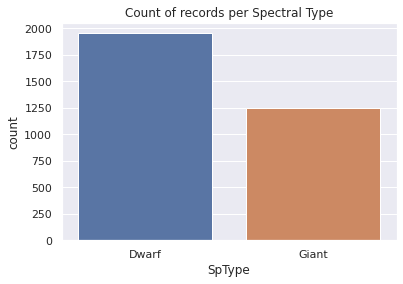

In [ ]:

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="SpType", data=df)
ax.set_title('Count of records per Spectral Type')
ax.set_xticklabels(['Dwarf', 'Giant'])
plt.show()

As shown in the bar graph, after data cleaning, we result in more Dwarf records than Giant records. This might not be a fair amount to train the data but dropping random records that contain usable data could affect the performance of our model, therefore we will continue to use this data.


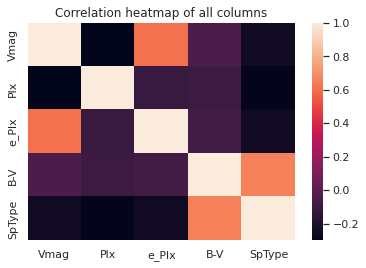

In [ ]:
#to not get correlation of unnamed column
dfTemp=df[df.columns[1:]].corr()
ax = sns.heatmap(dfTemp)
ax.set_title('Correlation heatmap of all columns')
plt.show()

**Correlation value indications are as follows:**
- 0 - no linear relationship between the variables
- (1) or (-1) - a perfect positive linear relationship – as one variable increases, the other variable also increases
- (0 to 0.3) or (0 to −0.3)-  weak positive (or negative) linear relationship 
- (0.3 to 0.7) or (-0.3 to −0.7)- moderate positive (or negative) linear relationship 
- (0.7 to 1.0) or (−0.7 to −1.0) - strong positive (negative) linear relationship 

In the correlation heatmap above, SpType and the features Vmag, Plx, and e_Plx seem to have very little correlation, therefore the variables do not seem to be very important for classification. This tells us that we should explore them later by checking if the omission of these variables will increase the accuracy of our model or not.

B-V seems to be highly correlated with SpType, thus seems very important in our classification and will be kept. As it is highly correlated with Sp_Type(the dependent variable) but less correlated with the other variables, it is ideal for use in our algorithm, unlike Vmag which is moderately correlated to e_Plx. 


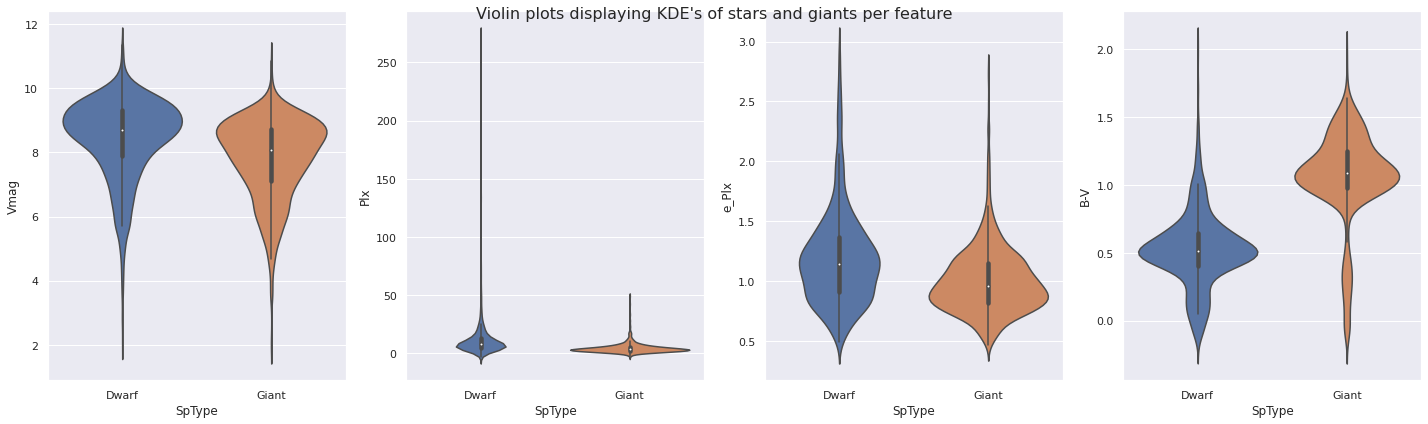

In [ ]:

fig, ax =plt.subplots(1,4,figsize=(20,6))
plt.suptitle("Violin plots displaying KDE's of stars and giants per feature", size=16)
#KDE=Kernel Density Estimation

sns.violinplot(x="SpType",y="Vmag",data=df,ax=ax[0])
sns.violinplot(x="SpType", y="Plx",data=df,ax=ax[1])
sns.violinplot(x="SpType", y="e_Plx",data=df,ax=ax[2])
sns.violinplot(x="SpType", y="B-V",data=df,ax=ax[3])

ax[0].set_xticklabels(['Dwarf', 'Giant'])
ax[1].set_xticklabels(['Dwarf', 'Giant'])
ax[2].set_xticklabels(['Dwarf', 'Giant'])
ax[3].set_xticklabels(['Dwarf', 'Giant'])

fig.tight_layout()
fig.show()

The correlation heatmap values are easier to understand after the visualisation of the data above using a KDE (Kernel Density Estimate) plot of the data. 

The Vmag vs SpType violinplot is very similar in values and shape for Dwarves and Giants (the highest density being in the 8-10 range), thus making it harder to distinguish between them and not as relevant for classification. The same can be said for e_Plx and Plx, as the majority of their values occur around the same regions for both Y classes, making it harder to distinguish between the two categories just by visualising. There also appears to be a huge outlier with Plx, largely increasing the scale of the data in comparison to the other variables, which could result in a slower run of our model due to the different scaled, but this can be fixed using feature scaling. 

Alternatively, B-V's distribution of the data is very different per category of Spectral Type therefore these differences make it easier to distinguish a Dwarf from a Giant, as the biggest areas (most data) on the violin plot are not in similar areas for each category. 


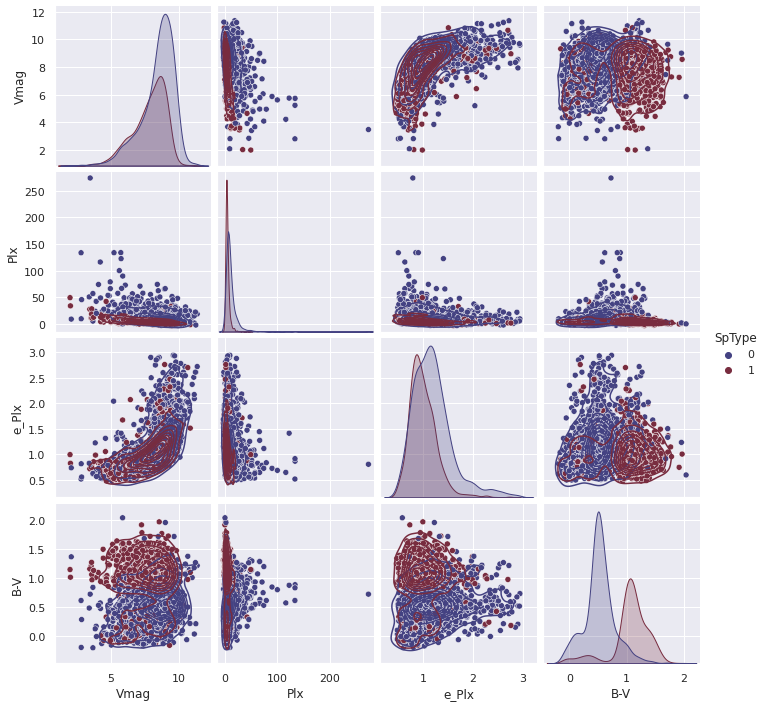

In [ ]:
sbnPlot=sns.pairplot(data=df[["Vmag","Plx","e_Plx","B-V","SpType"]], hue='SpType', palette='icefire')


sbnPlot=sbnPlot.map_upper(sns.kdeplot)
sbnPlot=sbnPlot.map_lower(sns.kdeplot)


The diagrams above show linear separability of each feature with each other, as well as how they relate to the class SpType. Logistic models work best with linearly separable data, thus the best set of features to use would be B-V, e_Plx and VMag, as they seem to be linearly separable: there are clear differences between the areas of the clusters per category. Whilst e_Plx and VMag are not linearly separable, the combination of VMag and B-V, and B-V and e_Plx seem to be.



### OUTCOMES OF THE DATA VISUALISATION:

After performing the data visualisation, the conclusion is to test the data's accuracy on:


*   All the features
*   A lower number of features
*   The same number of records for dwarfs and giants



## MACHINE LEARNING TECHNIQUES:

In [ ]:
#EXTRACT FEATURES FROM ORIGINAL DATASET:
dataX=df[['Vmag','Plx','e_Plx','B-V']]

display(dataX)
#CLASS OUTPUT:
dataY=df['SpType']

#split into train, test
train_ratio = 0.65
# validation_ratio = 0.15
test_ratio = 0.35

# 0.9,0.1

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
dfx_train, dfx_test, dfy_train, dfy_test = train_test_split(dataX, dataY, test_size=test_ratio,random_state=42)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
# x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


,Vmag,Plx,e_Plx,B-V
3,8.06,7.75,0.97,0.370
4,8.55,2.87,1.11,0.902
9,8.59,10.76,1.10,0.489
11,8.43,4.06,1.16,1.484
12,8.80,3.49,1.48,1.128
...,...,...,...,...
9984,8.46,3.23,0.94,1.403
9991,8.81,3.86,1.18,0.540
9992,9.05,3.38,1.06,1.083
9993,8.98,8.11,1.30,0.480


In [ ]:
#turn dataframes into array
x_train=dfx_train.to_numpy()
y_train=dfy_train.to_numpy()

#to keep originals
x_train2=x_train.copy()

x_test=dfx_test.to_numpy()
y_test=dfy_test.to_numpy()

x_test2=x_test.copy()

from numpy import random
random.seed(42)




In [ ]:
def plotError(errors,act,alpha,learning_rate): 
    
    #plotting error over time 
    fig,ax=plt.subplots()
    t=np.array(range(0,len(errors),1))
    ax.plot(t,errors,c='orange',label='Error over time')
    title='Error over time for '+act+" with alpha = "+str(alpha)+" and learning rate = "+str(learning_rate)
    ax.set_title(title)
    ax.set_ylabel("Error")
    ax.set_xlabel("Iterations")

#Baseline Model 

We will start with a base line model that uses a logistic/sigmoid activation function. The learning rate is initialized to 0.0009 and alpha(for regularization) is set to 0.5. We have 3 hidden layers in our base model. 

In [ ]:
def baselineModel(x_t,x_te,y_t,y_te,alphaVal,learnRate, actFunc):
  x_train=x_t.copy()
  x_test=x_te.copy()
  y_train=y_t.copy()
  y_test=y_te.copy()

  mlp= MLPClassifier(solver='adam', alpha=alphaVal, hidden_layer_sizes=(4,4,4), activation=actFunc, max_iter=1000,learning_rate_init=learnRate) #instantiates the neural network model 
  mlp.fit(x_train, y_train) #fits model 

  acc=mlp.score(x_train, y_train)*100
  print(f"The model predicted values of the training dataset with an accuracy of {acc} %")

  acc=mlp.score(x_test, y_test)*100
  print(f"The model predicted values of the testing dataset with an accuracy of {acc} %")


  plotError(mlp.loss_curve_,actFunc,alphaVal,learnRate)

The model predicted values of the training dataset with an accuracy of 61.30895091434071 %
The model predicted values of the testing dataset with an accuracy of 60.71428571428571 %


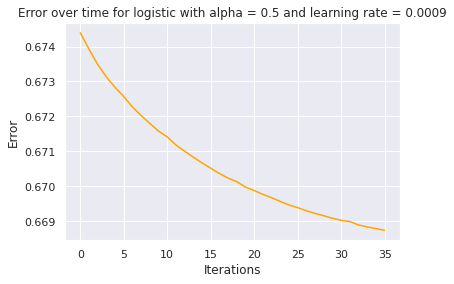

In [ ]:
alphaVal=0.5
learnRate=0.0009
baselineModel(x_train,x_test,y_train, y_test,alphaVal,learnRate, 'logistic')

## Seeing the effect of feature scaling

In [ ]:
def checkFeatureScalingPerformance(x_t, x_te,y_t,y_te,alphaVal,learnRate, actFunc):
  x_train=x_t.copy()
  x_test=x_te.copy()
  y_train=y_t.copy()
  y_test=y_te.copy()
    #feature scaling
  # Initialise the Scaler
  scaler = StandardScaler()
  
  # To scale data
  x_train=scaler.fit_transform(dfx_train)
  x_test=scaler.fit_transform(dfx_test)

  #TODO: plot histogram

  mlp= MLPClassifier(solver='adam', alpha=alphaVal, hidden_layer_sizes=(4,4,4), activation=actFunc, max_iter=1000,learning_rate_init=learnRate) #instantiates the neural network model 
  mlp.fit(x_train, y_train) #fits model 

  acc=mlp.score(x_train, y_train)*100
  print(f"The model predicted values of the training dataset with an accuracy of {acc}")

  acc=mlp.score(x_test, y_test)*100
  print(f"The model predicted values of the testing dataset with an accuracy of {acc} %")

  plotError(mlp.loss_curve_,actFunc,alphaVal,learnRate)

The model predicted values of the training dataset with an accuracy of 61.30895091434071
The model predicted values of the testing dataset with an accuracy of 60.71428571428571 %


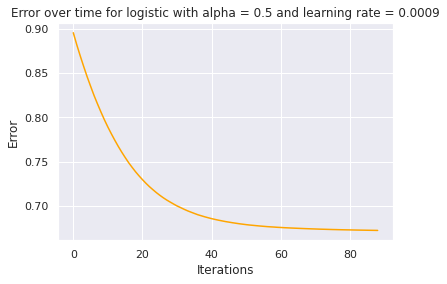

In [ ]:
checkFeatureScalingPerformance(x_train, x_test,y_train, y_test, alphaVal, learnRate, 'logistic')

Although our accuracy did not improve much, feature scaling has a positive effect in the way the algorithm learns and converges. The unscaled data makes the learning process rather slow and but more specifically unstable. The significant difference in the smoothness of the loss curves are a testament to this instability. One can also note that the scaled data converged faster. We will therefore continue to train on a scaled dataset.  


## Exploring the effect of different activation functions. 

3 activation functions will be explored. Namely tanh, sigmoid/logistic and relu.

In [ ]:
#for re-use later to explore other models
def exploreActivationFunctions(x_t, y_t, alphaVal, learnRate):
  x_train=x_t.copy()
  y_train=y_t.copy()
  bestAcc=0
  bestfunc=''
    #different activations 
  activations=['relu','tanh','logistic']

  for i in activations:
      print("exploring ",i)
      
      mlp= MLPClassifier(solver='adam', alpha=alphaVal, hidden_layer_sizes=(4,4,4), activation=i, max_iter=1000,learning_rate_init=learnRate) #instantiates the neural network model 
      mlp.fit(x_train, y_train) #fits model 
      acc=mlp.score(x_train, y_train)*100
      if (acc>bestAcc):
        bestfunc=i
        bestAcc=acc

      print(f"The model predicted values of the dataset with an accuracy of {acc} % ")
      plotError(mlp.loss_curve_,i,alphaVal,learnRate)
      print()
  return bestfunc
    

            

exploring  relu
The model predicted values of the dataset with an accuracy of 91.72281039461019 % 

exploring  tanh
The model predicted values of the dataset with an accuracy of 91.77093358999038 % 

exploring  logistic
The model predicted values of the dataset with an accuracy of 61.30895091434071 % 



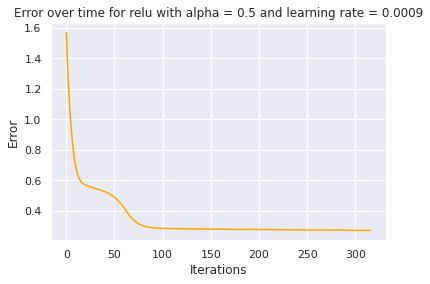

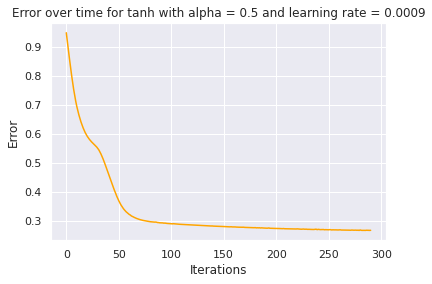

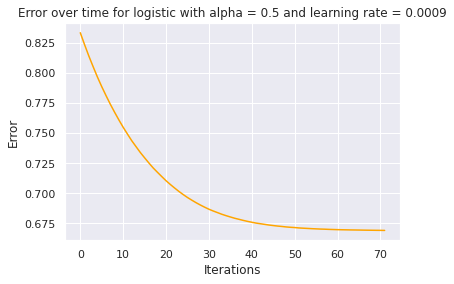

In [ ]:
actFunc=exploreActivationFunctions(x_train, y_train, alphaVal, learnRate)
actFunc='tanh'

Out of all 3 activation functions, logistic performs more poorly than the rest. Logistic and tanh both share the nature of having asymptotes where logistic is bounded between 0 and 1 and tanh between -1 and 1. The difference in the asymptotic behaviour has a large effect on the performance of the model, especially when it comes to the speed of the converge. [LeCun et al., 1998]. The reasoning behind this is that the tanh function is symmetric around the origin therefore it produces outputs close to 0 which is a good thing for optimization has the faster convergence. Models that use a tanh graph tend to have a smoother convergence compared to models that use the logistic activation function. Looking at the efficiency, tanh converges faster than relu. 

## Exploring the effect of network size on generalizability 

This is to tune our model-based hyperparameters:- These hyperparameters include, number of hidden layers, neurons, etc.
We will keep our hyperparameters constant to effectively see the effect of different network sizes. 

The model predicted values of the dataset with an accuracy of 38.69104908565929 % for size [4]
The model predicted values of the dataset with an accuracy of 61.30895091434071 % for size [4, 4]
The model predicted values of the dataset with an accuracy of 90.95283926852743 % for size [120]
The model predicted values of the dataset with an accuracy of 91.28970163618865 % for size [120, 80, 100]
The model predicted values of the dataset with an accuracy of 71.5591915303176 % for size [6, 6]
The model predicted values of the dataset with an accuracy of 91.43407122232917 % for size [100]
The model predicted values of the dataset with an accuracy of 91.385948026949 % for size [6, 6, 6]
The model predicted values of the dataset with an accuracy of 91.57844080846968 % for size [10, 20, 30]
The model predicted values of the dataset with an accuracy of 91.81905678537055 % for size [8, 8, 8, 8]
The model predicted values of the dataset with an accuracy of 91.57844080846968 % for size [100, 80]


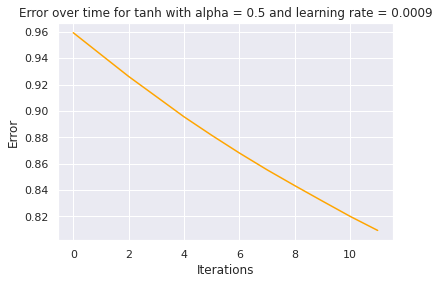

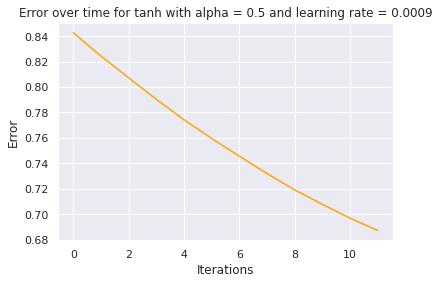

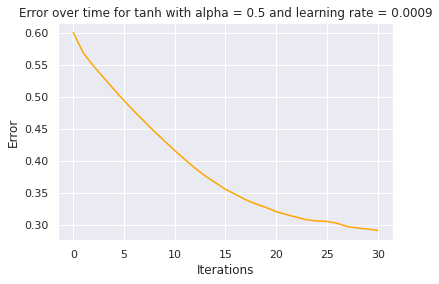

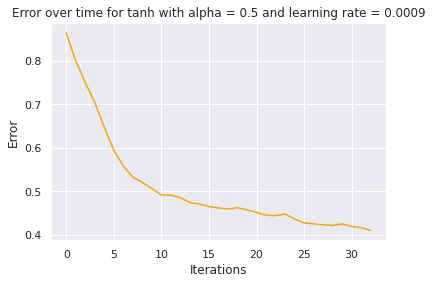

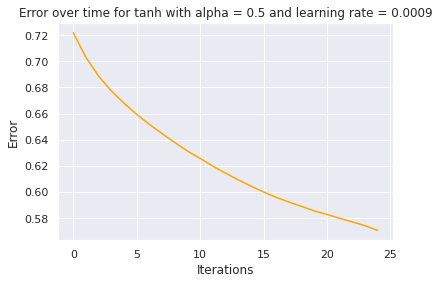

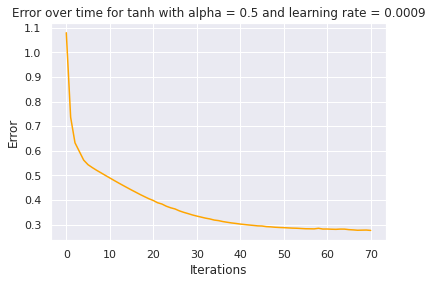

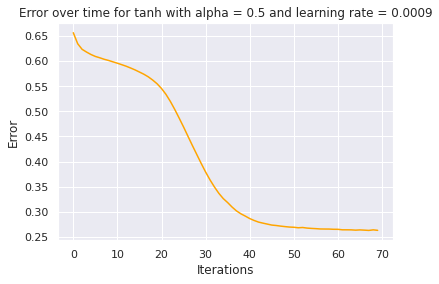

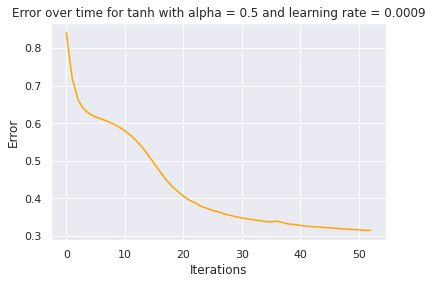

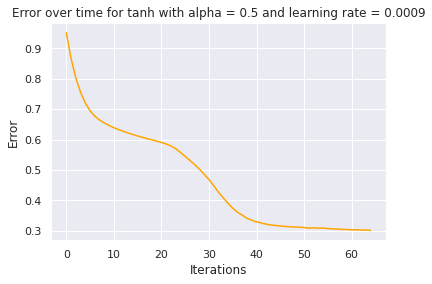

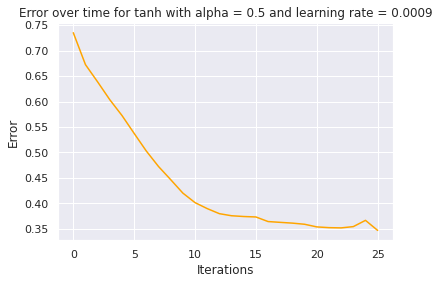

In [ ]:
def determineBestNumLayers(x_train, y_train, alphaVal, learnRate, actFunc):
  #different activations 
  sizes=[[4,],[4,4],[120,],[120,80,100],[6,6],[100,],[6,6,6],[10,20,30],[8,8,8,8],[100,80]]
  bestSize=[]
  bestAcc=0

  for i in sizes:

      
      mlp= MLPClassifier(solver='adam', alpha=alphaVal, hidden_layer_sizes=i, activation=actFunc, max_iter=1000,learning_rate_init=learnRate,early_stopping=True,validation_fraction=0.2) #instantiates the neural network model 
      mlp.fit(x_train, y_train) #fits model 
      acc=mlp.score(x_train, y_train)*100
      if (acc>bestAcc):
        bestSize=i
        bestAcc=acc

      print(f"The model predicted values of the dataset with an accuracy of {acc} % for size {i}" )
      plotError(mlp.loss_curve_,actFunc,alphaVal,learnRate)
  return bestSize
  

#use best activation function instead-> rather than logistic

bestSize=determineBestNumLayers(x_train, y_train, alphaVal, learnRate, actFunc)


#what was here before:
# bestSize=determineBestNumLayers(x_train, y_train, alphaVal, learnRate, 'logistic')          





In [ ]:
def printLossCurve(x_train, y_train, bestAlpha2, bestSize, bestLR2, actFunc):
    #printing the loss curve against validation accuracy 
  mlp= MLPClassifier(solver='adam', alpha=bestAlpha2, hidden_layer_sizes=bestSize, activation=actFunc, max_iter=5000,learning_rate_init=bestLR2,early_stopping=True,validation_fraction=0.2) #instantiates the neural network model 
  mlp.fit(x_train, y_train) #fits model 
  plt.plot(mlp.loss_curve_) #prints loss
  plt.plot(mlp.validation_scores_)
  print(mlp.score(x_train, y_train)*100)

61.30895091434071


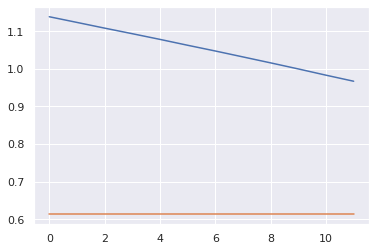

In [ ]:
#mlp= MLPClassifier(solver='adam', alpha=alphaVal, hidden_layer_sizes=[4,], activation=actFunc, max_iter=1000,learning_rate_init=learnRate,early_stopping=True,validation_fraction=0.2) #instantiates the neural network model 
printLossCurve(x_train, y_train, 0.5, [4,], 0.0009, actFunc)

For effiency, it is wise to choose the model that produces good accuracy while using relatively little hidden layers. 

## Exploring different hyperparameters 

We will tune algorithms based hyperparameters. The parameters (learning rate for gradient descent, alpha value for regularization) affect mainly the speed and efficiency. While training, we will use a validation set to avoid overfitting. The validation dataset is used to validate our model performance while training. We will train on the training dataset and simulaneously evaluate the trained model on the validation dataset. In the end we will pick the model that performs best on the validation set as an effort of improving generalizability. We will terminate training if the validation score is not improving. From the data used for training, 20% is set aside for validation. 

In [ ]:
def exploreLearningRates(x_train, y_train, bestSize, actFunc):
  #create data
  tblData = []
    
  #define header names
  col_names = ["Alpha Value", "Learning rate","Accuracy"]
    
  
  #different learning rates 
  learning_rates=[0.1,0.02,0.0003,0.00001,0.5,0.0004,0.0009,0.0000004,0.01]


  #different alphas for regularization 
  alphas=[0,0.1,0.5,0.02,0.0005,0.0006,0.0000009,0.01]

  #store best values
  bestAlpha2=0
  bestLR2=0
  bestAcc2=0

  for j in learning_rates:
      for k in alphas:
          mlp= MLPClassifier(solver='adam', alpha=k, hidden_layer_sizes=bestSize, activation=actFunc, max_iter=5000,learning_rate_init=j,early_stopping=True,validation_fraction=0.2) #instantiates the neural network model 
          mlp.fit(x_train, y_train) #fits model 
          acc=mlp.score(x_train, y_train)*100
          if (acc>bestAcc2):
            bestAcc2=acc
            bestAlpha2=k
            bestLR2=j
          # tabulate the data neatly
          tblRowData=[k,j,acc]
          tblData.append(tblRowData)

          # print(f"The model predicted values of the dataset with an accuracy of {acc} % when alpha = {k} and learning_rate = {j}")

  #display table
  print(tabulate(tblData, headers=col_names))

  return bestAlpha2, bestLR2
  
#rather use best act func
bestAlpha2, bestLR2=exploreLearningRates(x_train, y_train, bestSize, actFunc)




  Alpha Value    Learning rate    Accuracy
-------------  ---------------  ----------
       0                0.1        91.6266
       0.1              0.1        91.4341
       0.5              0.1        90.8566
       0.02             0.1        91.3378
       0.0005           0.1        61.309
       0.0006           0.1        91.7709
       9e-07            0.1        91.3378
       0.01             0.1        91.1935
       0                0.02       91.8672
       0.1              0.02       91.4822
       0.5              0.02       91.4822
       0.02             0.02       91.6747
       0.0005           0.02       91.6747
       0.0006           0.02       91.2416
       9e-07            0.02       91.8191
       0.01             0.02       91.6266
       0                0.0003     90.9047
       0.1              0.0003     61.309
       0.5              0.0003     61.309
       0.02             0.0003     78.6333
       0.0005           0.0003     68.4793
       0.0006 

91.43407122232917


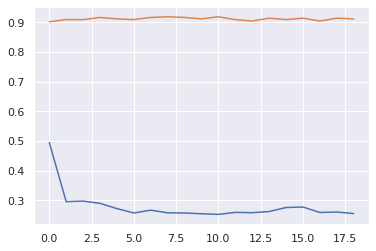

In [ ]:
printLossCurve(x_train, y_train, bestAlpha2, bestSize, bestLR2, actFunc)
# printLossCurve(x_train, y_train, bestAlpha2, bestSize, bestLR2, 'logistic')
  #TODO: plot more curves 

As the training loss descreases, the validation score increases which suggests that the model is not overfitting. 

## USING TWO FEATURES:

Since it is not ideal to drop features that are lowly correlated due to possibly getting rid of higher order relations, we instead perform Principal Component Analysis (PCA) on the data and see how well it performs with our model, as PCA reduces multicollinearity between features. As seen in the heatmap earlier, Vmag and e_Plx were highly correlated, thus reducing that collinearity might improve our data. If most of the correlation coefficients are smaller than 0.3, PCA will not help, but with our data, those variables were highly correlated.

In [ ]:
alphaVal=0.4
learnRate-0.0009
#ensure not to alter original features
x_train2F=x_train2.copy()
x_test2F=x_test2.copy()
# Initialise the Scaler
scaler = StandardScaler()
  
# To scale data before performing PCA
x_train2F=scaler.fit_transform(x_train2F)
x_test2F=scaler.fit_transform(x_test2F)

#reduce data to 2 features
pca = PCA(n_components=2)
x_train2F=pca.fit_transform(x_train2F)
x_test2F=pca.fit_transform(x_test2F)

print("NEW TRAINING SAMPLES WITH 2 FEATURES:\n",x_train2F)
print("\nNEW TESTING SAMPLES WITH 2 FEATURES:\n",x_test2F)


NEW TRAINING SAMPLES WITH 2 FEATURES:
 [[-0.12855149  0.51855294]
 [ 1.16752735  0.52672397]
 [ 0.55673077 -1.21979373]
 ...
 [-0.17793761  0.68540324]
 [-0.65122734  0.3367063 ]
 [-1.56280167 -0.25094728]]

NEW TESTING SAMPLES WITH 2 FEATURES:
 [[ 1.44733234 -1.34529719]
 [-2.02409179  0.72103973]
 [-0.54402219 -1.59792043]
 ...
 [ 0.08860965  0.14170952]
 [ 1.26270437 -1.0133788 ]
 [-0.21060123 -0.88300858]]


The model predicted values of the training dataset with an accuracy of 61.30895091434071 %
The model predicted values of the testing dataset with an accuracy of 60.71428571428571 %


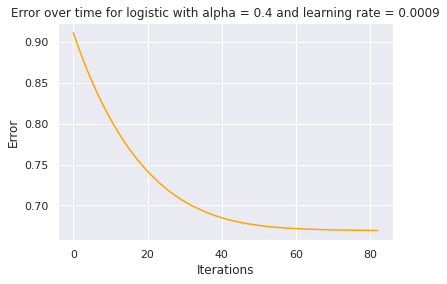

In [ ]:
baselineModel(x_train2F,x_test2F,y_train, y_test, alphaVal, learnRate, 'logistic')


Compared to 4 features, the training model performs significantly better.

exploring  relu
The model predicted values of the dataset with an accuracy of 91.28970163618865 % 

exploring  tanh
The model predicted values of the dataset with an accuracy of 91.28970163618865 % 

exploring  logistic
The model predicted values of the dataset with an accuracy of 61.30895091434071 % 



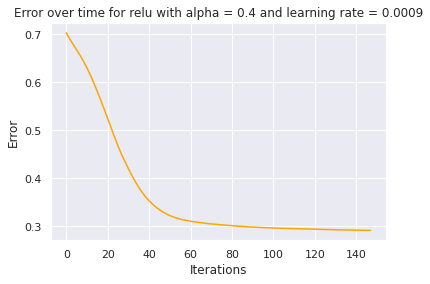

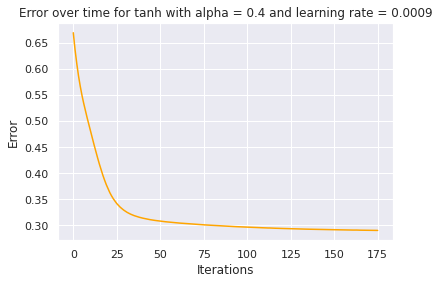

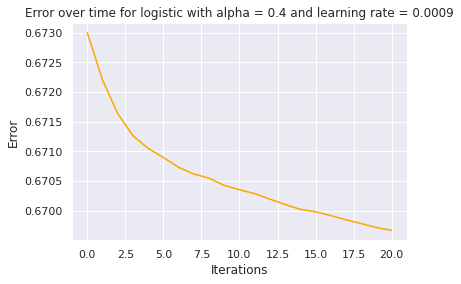

In [ ]:
actFunc2=exploreActivationFunctions(x_train2F, y_train,alphaVal, learnRate)

The effect of PCA helped the logistic regression activation function considerably compared to the performance using 4 features, but decreases the performance of the tanh and relu models. It does not seem ideal for the latter two as they performed better with 4 features, but we shall continue to explore the performance of the best performing activation function, which is tanh as shown in the graphs above.

The model predicted values of the dataset with an accuracy of 91.14533205004813 % with size [4] 
The model predicted values of the dataset with an accuracy of 91.1934552454283 % with size [4, 4] 
The model predicted values of the dataset with an accuracy of 91.33782483156881 % with size [120] 
The model predicted values of the dataset with an accuracy of 91.62656400384985 % with size [120, 80, 100] 


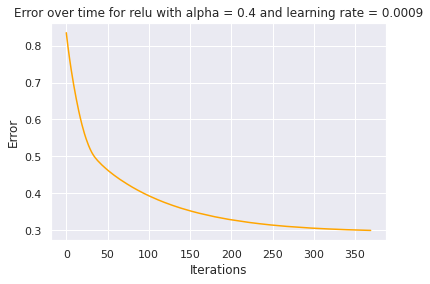

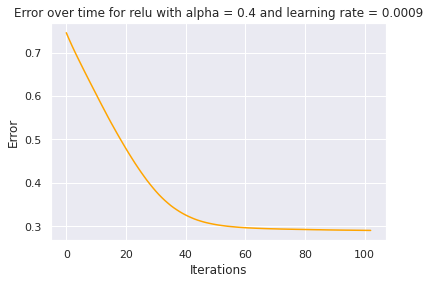

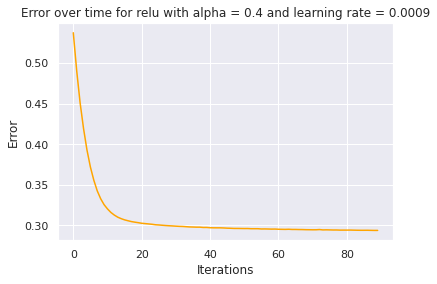

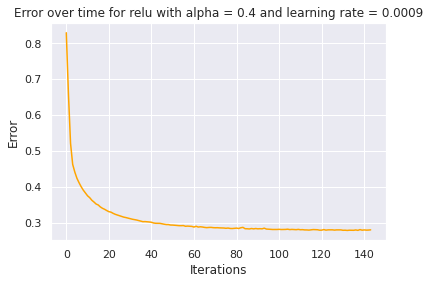

In [ ]:
accMax=0
layer=[]
#different activations 
sizes=[[4,],[4,4],[120,],[120,80,100]]

for i in sizes:
    mlp= MLPClassifier(solver='adam', alpha=alphaVal, hidden_layer_sizes=i, activation=actFunc2, max_iter=1000,learning_rate_init=learnRate) #instantiates the neural network model 
    mlp.fit(x_train2F, y_train) #fits model 
    acc=mlp.score(x_train2F, y_train)*100
    if (acc>accMax):
      accMax=acc
      layer=i
    
    print(f"The model predicted values of the dataset with an accuracy of {acc} % with size {i} ")
    plotError(mlp.loss_curve_,actFunc2,alphaVal,learnRate)
  



In [ ]:
#different learning rates 
learning_rates=[0.1,0.02,0.0003,0.00001,0.5,0.0004,0.0009,0.0000004,0.01]


#different alphas for regularization 
alphas=[0,0.1,0.5,0.02,0.0005,0.0006,0.0000009,0.01]
#store best values
bestAlpha=0
bestLR=0
bestAcc=0

for j in learning_rates:
    for k in alphas:
        mlp= MLPClassifier(solver='adam', alpha=k, hidden_layer_sizes=layer, activation=actFunc2, max_iter=5000,learning_rate_init=j,early_stopping=True,validation_fraction=0.2) #instantiates the neural network model 
        mlp.fit(x_train2F, y_train) #fits model 
        acc=mlp.score(x_train2F, y_train)*100
        if (acc>bestAcc):
          bestAcc=acc
          bestAlpha=k
          bestLR=j

print(f"The best predicted values of the dataset are when alpha = {bestAlpha} and learning_rate = {bestLR} with an accuracy of {bestAcc} %")
        # print()



The best predicted values of the dataset are when alpha = 0.02 and learning_rate = 0.01 with an accuracy of 91.96342637151108 %


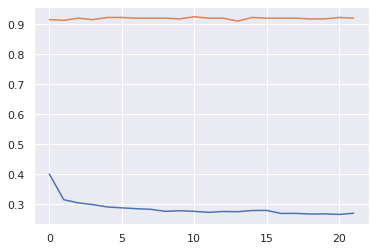

In [ ]:
#printing the loss curve against validation accuracy 
mlp= MLPClassifier(solver='adam', alpha=bestAlpha, hidden_layer_sizes=layer, activation=actFunc2, max_iter=5000,learning_rate_init=bestLR,early_stopping=True,validation_fraction=0.2) #instantiates the neural network model 
mlp.fit(x_train2F, y_train) #fits model 
plt.plot(mlp.loss_curve_) #prints loss
plt.plot(mlp.validation_scores_)

#TODO: plot more curves 

# OVERSAMPLING THE MINORITY TO MAKE CLASSES EQUAL

In [ ]:
from scipy.sparse import data
#  a combination of over-sampling the minority (abnormal) class and under-sampling the majority (normal) class can achieve better classifier performance (in ROC space) than only under-sampling the majority class.

sx=df[["Vmag","Plx","e_Plx","B-V"]].to_numpy()
sy=df[["SpType"]].to_numpy()

print("Old size:",sx.shape)

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
sx, sy = oversample.fit_resample(sx, sy)
print("New size:",sx.shape)
print("Number of 0's:",np.count_nonzero(sy== 0))
print("Number of 1's:",np.count_nonzero(sy== 1))


#split into train/test
dfx_train, dfx_test, dfy_train, dfy_test = train_test_split(sx, sy, test_size=test_ratio,random_state=42)

#turn dataframes into array
sx_train=dfx_train
sy_train=dfy_train

sx_test=dfx_test
sy_test=dfy_test


from numpy import random
random.seed(42)


Old size: (3198, 4)
New size: (3908, 4)
Number of 0's: 1954
Number of 1's: 1954


The model predicted values of the training dataset with an accuracy of 50.511811023622045 %
The model predicted values of the testing dataset with an accuracy of 49.04970760233918 %


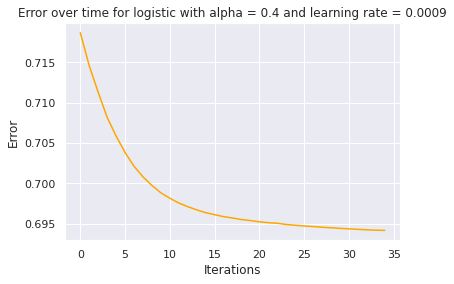

In [ ]:
baselineModel(sx_train, sx_test,sy_train, sy_test,alphaVal,learnRate,'logistic')

exploring  relu
The model predicted values of the dataset with an accuracy of 90.70866141732283 % 

exploring  tanh
The model predicted values of the dataset with an accuracy of 90.70866141732283 % 

exploring  logistic
The model predicted values of the dataset with an accuracy of 91.18110236220473 % 



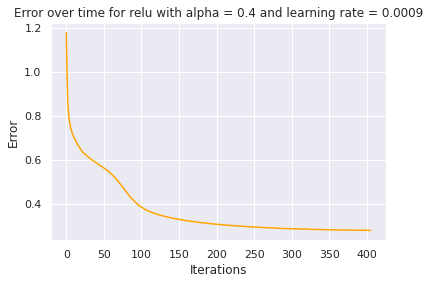

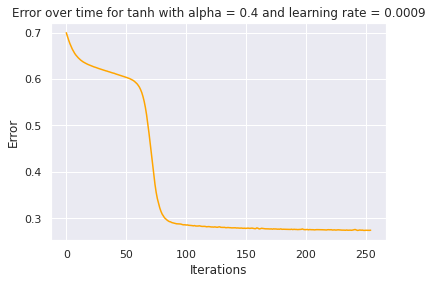

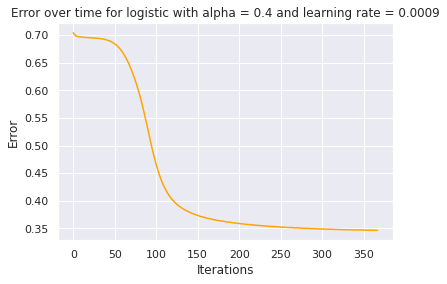

In [ ]:
actFunc3=exploreActivationFunctions(sx_train, sy_train, alphaVal, learnRate)

The model predicted values of the dataset with an accuracy of 70.07874015748031 % for size [4]
The model predicted values of the dataset with an accuracy of 50.511811023622045 % for size [4, 4]
The model predicted values of the dataset with an accuracy of 90.66929133858268 % for size [120]
The model predicted values of the dataset with an accuracy of 90.70866141732283 % for size [120, 80, 100]
The model predicted values of the dataset with an accuracy of 73.11023622047243 % for size [6, 6]
The model predicted values of the dataset with an accuracy of 90.90551181102362 % for size [100]
The model predicted values of the dataset with an accuracy of 69.60629921259842 % for size [6, 6, 6]
The model predicted values of the dataset with an accuracy of 90.66929133858268 % for size [10, 20, 30]
The model predicted values of the dataset with an accuracy of 50.511811023622045 % for size [8, 8, 8, 8]
The model predicted values of the dataset with an accuracy of 90.5511811023622 % for size [100, 80

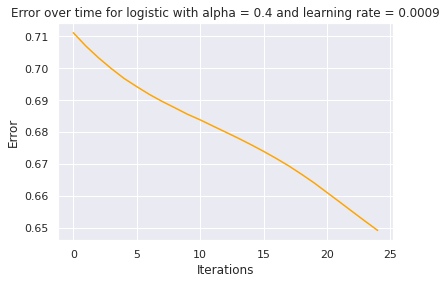

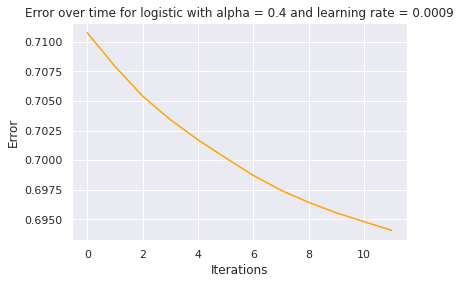

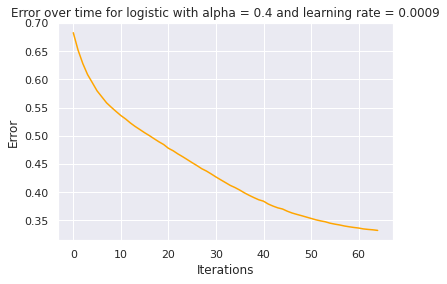

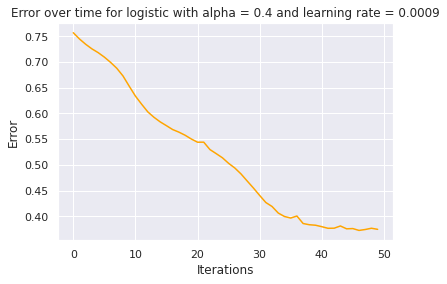

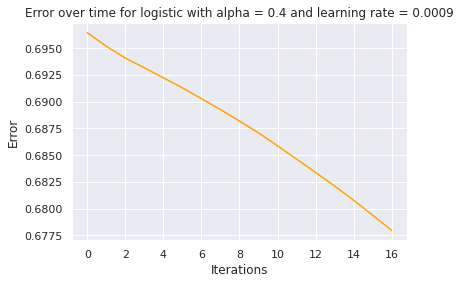

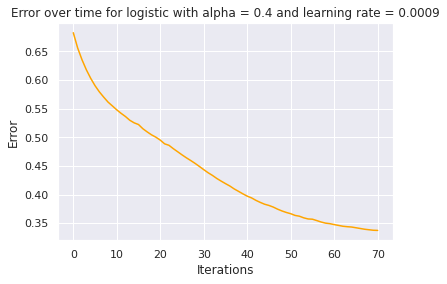

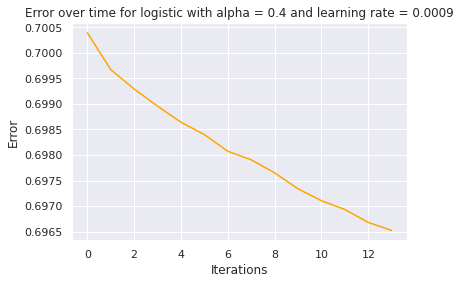

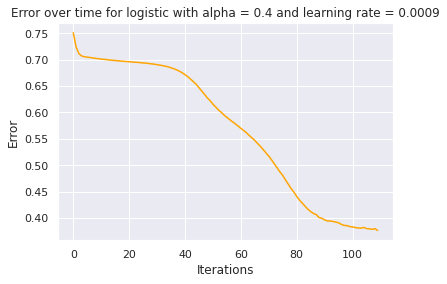

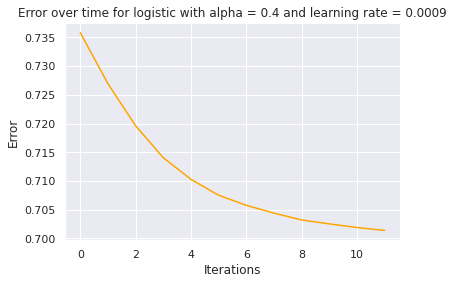

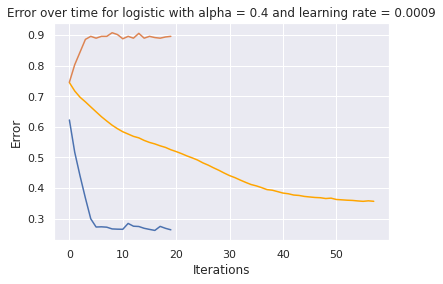

In [ ]:
bestSize3=determineBestNumLayers(sx_train, sy_train, alphaVal, learnRate, actFunc3)


#rather use best act func
bestAlpha3, bestLR3=exploreLearningRates(sx_train, sy_train, bestSize3, actFunc3)

printLossCurve(sx_train, sy_train, bestAlpha3, bestSize3, bestLR3, actFunc3)

UNDERSAMPLING THE MAJORITY TO MAKE THE CLASSES EQUAL

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

sx2=df[["Vmag","Plx","e_Plx","B-V"]].to_numpy()
sy2=df[["SpType"]].to_numpy()

print("Old size:",sx2.shape)

# display(sx_train)


# print(Counter(sy))
# define oversampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
sx2, sy2 = undersample.fit_resample(sx2, sy2)
print("New size:",sx2.shape)
print("Number of 0's:",np.count_nonzero(sy2== 0))
print("Number of 1's:",np.count_nonzero(sy2== 1))

#split into train/test
dfx_train, dfx_test, dfy_train, dfy_test = train_test_split(sx2, sy2, test_size=test_ratio,random_state=42)

#turn dataframes into array
sx2_train=dfx_train
sy2_train=dfy_train

sx2_test=dfx_test
sy2_test=dfy_test


from numpy import random
random.seed(42)

Old size: (3198, 4)
New size: (2488, 4)
Number of 0's: 1244
Number of 1's: 1244


The model predicted values of the training dataset with an accuracy of 50.46382189239333 %
The model predicted values of the testing dataset with an accuracy of 49.13892078071183 %


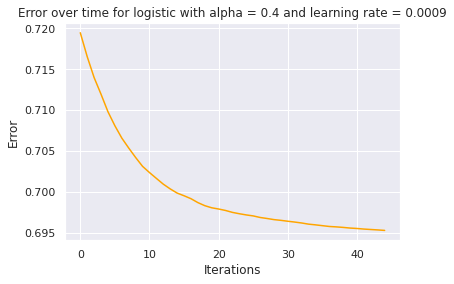

In [ ]:
baselineModel(sx2_train, sx2_test,sy2_train, sy2_test,alphaVal,learnRate,'logistic')

exploring  relu
The model predicted values of the dataset with an accuracy of 91.4656771799629 % 

exploring  tanh
The model predicted values of the dataset with an accuracy of 91.15646258503402 % 

exploring  logistic
The model predicted values of the dataset with an accuracy of 49.53617810760667 % 



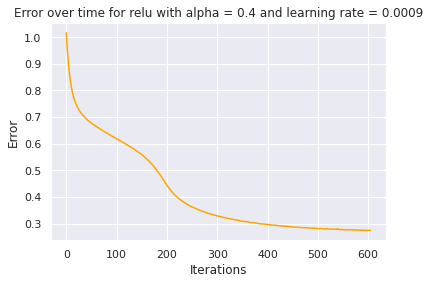

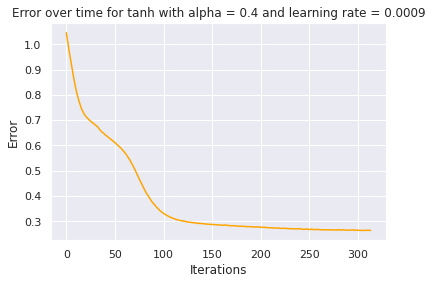

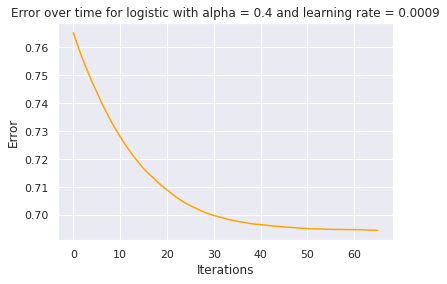

In [ ]:
actFunc4=exploreActivationFunctions(sx2_train, sy2_train, alphaVal, learnRate)

The model predicted values of the dataset with an accuracy of 49.53617810760667 % for size [4]
The model predicted values of the dataset with an accuracy of 88.68274582560296 % for size [4, 4]
The model predicted values of the dataset with an accuracy of 87.75510204081633 % for size [120]
The model predicted values of the dataset with an accuracy of 91.4656771799629 % for size [120, 80, 100]
The model predicted values of the dataset with an accuracy of 70.31539888682747 % for size [6, 6]
The model predicted values of the dataset with an accuracy of 90.9090909090909 % for size [100]
The model predicted values of the dataset with an accuracy of 49.53617810760667 % for size [6, 6, 6]
The model predicted values of the dataset with an accuracy of 69.82065553494124 % for size [10, 20, 30]
The model predicted values of the dataset with an accuracy of 91.03277674706246 % for size [8, 8, 8, 8]
The model predicted values of the dataset with an accuracy of 91.2183055040198 % for size [100, 80]
  

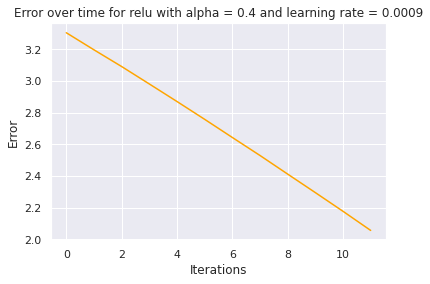

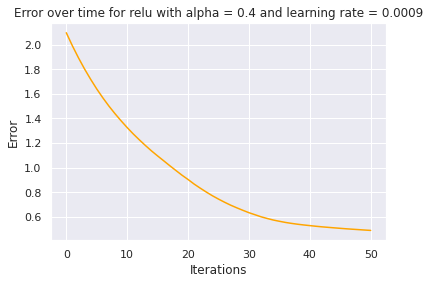

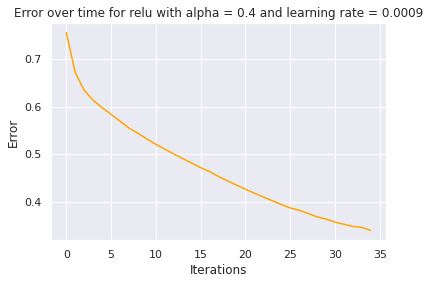

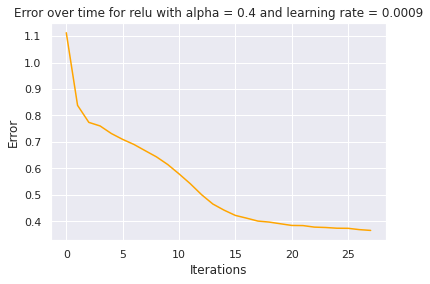

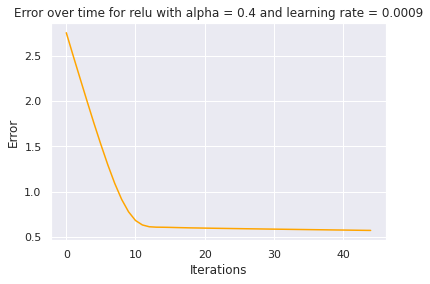

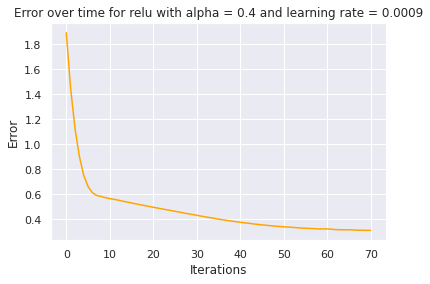

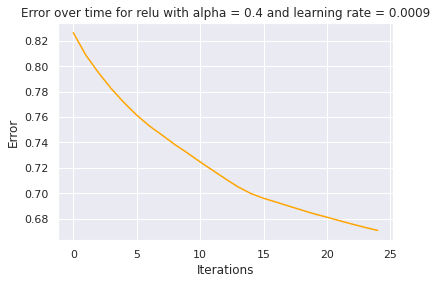

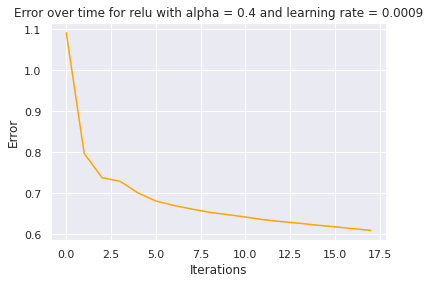

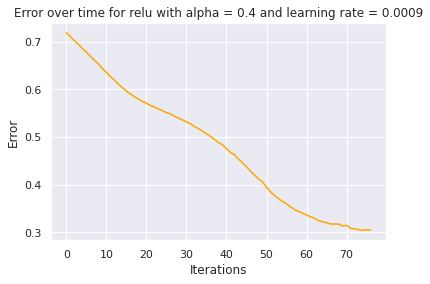

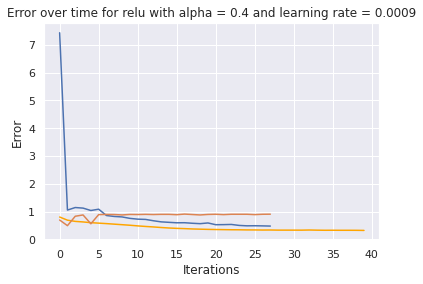

In [ ]:
bestSize4=determineBestNumLayers(sx2_train, sy2_train, alphaVal, learnRate, actFunc4)


#rather use best act func
bestAlpha4, bestLR4=exploreLearningRates(sx2_train, sy2_train, bestSize4, actFunc4)

printLossCurve(sx2_train, sy2_train, bestAlpha4, bestSize4, bestLR4, actFunc4)

Considering that 4 features performed better than 2, we shall proceed with using the 4 feature algorithm instead.

#Best Model 

In [ ]:
mlp= MLPClassifier(solver='adam', alpha=bestAlpha2, hidden_layer_sizes=bestSize, activation=actFunc, max_iter=5000,learning_rate_init=bestLR2) #instantiates the neural network model 
# mlp= MLPClassifier(solver='sgd', alpha=0.01, hidden_layer_sizes=(120,100,80), activation='tanh', max_iter=5000,random_state=1,learning_rate_init=0.01) #instantiates the neural network model 
mlp.fit(x_train, y_train) #fits model 

acc=mlp.score(x_train, y_train)*100

print(f"The {actFunc} activation function model with alpha={bestAlpha2} and learning rate={bestLR2} predicted values of the training dataset with an accuracy of {acc} % ")

acc=mlp.score(x_test, y_test)*100
print(f"The {actFunc} activation function model with alpha={bestAlpha2} and learning rate={bestLR2} predicted values of the testing dataset with an accuracy of {acc} % ")

The tanh activation function model with alpha=0 and learning rate=0.02 predicted values of the training dataset with an accuracy of 91.67468719923004 % 
The tanh activation function model with alpha=0 and learning rate=0.02 predicted values of the testing dataset with an accuracy of 91.78571428571428 % 


In [ ]:
print(bestSize)

[10, 20, 30]


When the model is tested on the new dataset, it shows that it is robust as the testing error is close to the training error. This model uses less hidden layers than the baseline model therefore it is faster with a better accuracy. 

##PCA:

In [ ]:
#TWO FEATURES

mlp= MLPClassifier(solver='adam', alpha=bestAlpha, hidden_layer_sizes=layer, activation=actFunc2, max_iter=5000,learning_rate_init=bestLR) #instantiates the neural network model 
# mlp= MLPClassifier(solver='sgd', alpha=0.01, hidden_layer_sizes=(120,100,80), activation='tanh', max_iter=5000,random_state=1,learning_rate_init=0.01) #instantiates the neural network model 
mlp.fit(x_train2F, y_train) #fits model 

acc=mlp.score(x_train2F, y_train)*100

print(f"The {actFunc2} activation function model with alpha={bestAlpha} and learning rate={bestLR} predicted values of the training dataset with an accuracy of {acc} % ")

acc=mlp.score(x_test2F, y_test)*100
print(f"The {actFunc2} activation function model with alpha={bestAlpha} and learning rate={bestLR} predicted values of the testing dataset with an accuracy of {acc} % ")

The relu activation function model with alpha=0.02 and learning rate=0.01 predicted values of the training dataset with an accuracy of 91.53031761308951 % 
The relu activation function model with alpha=0.02 and learning rate=0.01 predicted values of the testing dataset with an accuracy of 91.78571428571428 % 


OVERSAMPLING MINORITY FINAL ACCURACY:

In [ ]:
#oversampling minority:
mlp= MLPClassifier(solver='adam', alpha=bestAlpha3, hidden_layer_sizes=bestSize3, activation=actFunc3, max_iter=5000,learning_rate_init=bestLR3) #instantiates the neural network model 
# mlp= MLPClassifier(solver='sgd', alpha=0.01, hidden_layer_sizes=(120,100,80), activation='tanh', max_iter=5000,random_state=1,learning_rate_init=0.01) #instantiates the neural network model 
mlp.fit(sx_train, sy_train) #fits model 

acc=mlp.score(sx_train, sy_train)*100

print(f"The {actFunc3} activation function model with alpha={bestAlpha3} and learning rate={bestLR3} predicted values of the training dataset with an accuracy of {acc} % ")

acc=mlp.score(sx_test, sy_test)*100
print(f"The {actFunc3} activation function model with alpha={bestAlpha3} and learning rate={bestLR3} predicted values of the testing dataset with an accuracy of {acc} % ")

The logistic activation function model with alpha=0.02 and learning rate=0.02 predicted values of the training dataset with an accuracy of 91.22047244094487 % 
The logistic activation function model with alpha=0.02 and learning rate=0.02 predicted values of the testing dataset with an accuracy of 91.73976608187134 % 


UNDERSAMPLING MAJORITY FINAL ACCURACY:

In [ ]:

#undersampling majority:
mlp= MLPClassifier(solver='adam', alpha=bestAlpha4, hidden_layer_sizes=bestSize4, activation=actFunc4, max_iter=5000,learning_rate_init=bestLR4) #instantiates the neural network model 
# mlp= MLPClassifier(solver='sgd', alpha=0.01, hidden_layer_sizes=(120,100,80), activation='tanh', max_iter=5000,random_state=1,learning_rate_init=0.01) #instantiates the neural network model 
mlp.fit(sx2_train, sy2_train) #fits model 

acc=mlp.score(sx2_train, sy2_train)*100

print(f"The {actFunc4} activation function model with alpha={bestAlpha4} and learning rate={bestLR4}  predicted values of the training dataset with an accuracy of {acc} % ")

acc=mlp.score(sx2_test, sy2_test)*100
print(f"The {actFunc4} activation function model with alpha={bestAlpha4} and learning rate={bestLR4}  predicted values of the testing dataset with an accuracy of {acc} % ")

The relu activation function model with alpha=0.1 and learning rate=0.1  predicted values of the training dataset with an accuracy of 91.4038342609771 % 
The relu activation function model with alpha=0.1 and learning rate=0.1  predicted values of the testing dataset with an accuracy of 90.92996555683122 % 


Tha above model does not have as many features to train on, thus decreasing accuracy. Undersampling performs worse as you drop features, thus lose important data that could have helped to predict the model, whereas oversampling performs better as you retain all the data in your original dataset. 